In [8]:
import matplotlib
#matplotlib.use('Agg')
import sys
import gc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import FormatStrFormatter

# Para manejar los archivos y automatizar la lectura en directorios
import csv
import os

# Fontsize
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 
# Latex font
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
%matplotlib inline

# Nombres de archivo, paths y definiciones

In [9]:
# SOME DEFINITIONS
# Level of the simulation ('_' for filename format)
lvl = 'Level 4/level4_'
# number of halos
nhalos = 30 

'''# level of the simulation
lvl = 'Level 3/level3_'
# number of halos
nhalos = 6''' 

# FOLDER CONTAINING ALL FILES
folder = '../Data/Halo_General/'

# FILENAMES
# Triaxial eigensystem different radii (MHD & DM) using volumetric (mean) density: Allgood et al.
fn_axes = lvl+'axes'+'.csv' # Axes = axial ratios (sqrt of eigenvals)
# Triaxial system approximation with Isopotential contours
fn_axes_pot = lvl+'potential_axes'+'.csv'
# Triaxial system approximation with Isodensity contours
fn_axes_den = lvl+'density_axes'+'.csv'



# Reads file in "path/filename"
# Returns data as a numpy array
# Returns filenames as a list of strings
# Returns headers as an array of strings

def read_csv(filename,skip_header=1):

    # Removes quotations from file (little writing error) 
    os.system('sed -i \'s/"//g\' '+filename) 
    
    # FILENAMES!
    headers = []
    with open( filename , 'r') as myfile:
        rd = csv.reader(myfile)
        headers = next(rd) # gets only first line 
    
    data = np.genfromtxt(filename, delimiter = ',', skip_header=skip_header, dtype=float )
    
    return headers,data

# Obteniendo los datos

In [10]:
# Obtiene el contenido del archivo de semiejes
headers,axes = read_csv(folder+fn_axes)
print(headers)
headers,axes_den = read_csv(folder+fn_axes_den)
print(headers)
headers,axes_pot = read_csv(folder+fn_axes_pot)
print(headers)

['a12', 'b12', 'c12', 'a25', 'b25', 'c25', 'a50', 'b50', 'c50', 'a1', 'b1', 'c1', 'aDisk', 'bDisk', 'cDisk']
['a12', 'b12', 'c12', 'a25', 'b25', 'c25', 'a50', 'b50', 'c50', 'a1', 'b1', 'c1', 'aDisk', 'bDisk', 'cDisk']
['a12', 'b12', 'c12', 'a25', 'b25', 'c25', 'a50', 'b50', 'c50', 'a1', 'b1', 'c1', 'aDisk', 'bDisk', 'cDisk']


# Definiciones
Funciones para estimar los ejes 

In [11]:

# given axes from isopotential contounrs, returns the estimated axes of isodensity contours.
# Simplification from approximation from Binney and Tremaine
# Super simplified version
# Used in papers https://watermark.silverchair.com/912.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAAj4wggI6BgkqhkiG9w0BBwagggIrMIICJwIBADCCAiAGCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMZ7DdyPCl2DEr-0OIAgEQgIIB8cfsK9UUR2QWCInOKuHM_2P_HRUlsApdjO58k-shqoJoUiU8lAhMZIF_BQq7b1jT9A2ysT9RcqPDgAi6XDdu-L9qRPIigP7z2WTI-B5tS4hiGwiKFVeb8BfkPUEXu2HtYMO_OCiVKAm7Ri06KYVa0feHRb13qYmw0E353o7PxthjP--wucJO33hT74OCmMXNGwc656cSYG60hzj37l5SITVBF5zWFhbSHUMwaR89jbDqjFBabuSgrtyFdS-WVvbLHJK3k3_0MQBYxOFntbE0b-2ogTDZmYFmfDm0zz9p-li0gO1TSWal_kXxJj4lomAh-yuFdYZBje7HoEotsrme_PdMWeuY5fF-hiGwpWUv37Yh7OpDDtClMTOB43RRLFklRzuw9UMJjMF2PiScXZNAfepYVyWU4zwOcTGU7_4GDy_nzyksuJtStuBOjl3uYd7Z3mWo6oY0o80lTlE8myuYowE5FWli501HG588pC4pvljknsGDuNVk-O4-n6DnpCRni6980dIERL7uFpqTRHObSiUsCmESX_yq2bavGfttj8TlcY12qYliMMlERfRK5N09QcdCcbKa8FzkhSyW244iJat7Lm96SfE-TI_Mf6d1cQZIgcGQv1JWiAj_fRiVdAQGRja9uACHwAIdqUl2OoJHSSm6
# Here the ratios are with respect to the z axis.Sometimes it is bigger than one, and some times it is less than one
# We assume z axis is the smaller axis and the halo is approximately axisymmetric (for the formula to be valid)
def get_density_axes(axes):
    
    # Mid and Major axes are treated as the equals
    A = axes[0]/axes[2]
    B = axes[1]/axes[2]
    
    # Axis relation from Binney and Tremaine
    A = 3*(A-1)+1
    B = 3*(B-1)+1
    
    # We decide to maintain the major axis constant
    # this is irrelevant as we are treating axial ratios
    axes[1] = axes[0]*B/A
    axes[2] = axes[0]/A
    
    return axes 
    
    
# given axes from isopotential contounrs, returns the estimated axes of isodensity contours.
# Simplification from approximation from Binney & Tremaine
# Simplified version 1
# Simplification of higher order given a logarithmic halo potential
def get_density_axes2(axes):
    A = axes[0]/axes[2]
    B = axes[1]/axes[2]
    
    A = A*np.sqrt(2*A**2-1)
    B = B*np.sqrt(2*B**2-1)
    
    axes[1] = axes[0]*B/A
    axes[2] = axes[0]/A
    
    return axes     
    
# given axes from isopotential contounrs, returns the estimated axes of isodensity contours.
# Simplification from approximation from Binney & Tremaine
# Simplified version 2 
# Playing with interpretation and approximation of this formula
# for oblate halos to triaxial ones

def get_density_axes3(axes):
    A = axes[1]/axes[0]
    B = axes[2]/axes[0]
    
    A = A*np.sqrt(2*A**2-1)
    B = B*np.sqrt(2*B**2-1)
    
    axes[1] = A*axes[0]
    axes[2] = B*axes[0]
    
    return axes        


### Formato de archivo
\n
<font size=3>
En el archivo de semiejes, la primera letra es el semieje correspondiente $a>b>c$
Los caracteres consecutivos indican el radio en el que fue caracterizada la forma:
</font>

*  $12 \equiv 12.5\%\ R_{vir}$ 
*  $25 \equiv 25\%\ R_{vir}$ 
*  $50 \equiv 50\%\ R_{vir}$ 
*  $Disk \equiv Sampleado\ en\ el\ disco\ estelar$ 

\
<font size=3>
Adicionalmente, en terminos de filas, el archivo muestra los ejes de los halos MHD y DM intercalados de la siguiente manera:
</font>

*  --------Header------------
*  ----Info Halo1 MHD----
*  ----Info Halo1  DM------
*  ----Info Halo2 MHD----
*  ----Info Halo2  DM------
*        -------------...--------------

<font size=3>
Sin embargo, los otros metodos se calcularon unicamente para los halos DM ya que para estos existe una aproximacion teorica con la cual se puede comparar. Entonces, solo se cuenta con la informacion DM para estos metodos de obtencion de la forma de halos:
</font>

*  --------Header------------
*  ----Info Halo1  MHD------
*  ----Info Halo2  MHD------
*        -------------...--------------


\

<font size=3>
Para el archivo de vectores de ejes principales el formato sigue la misma logica
</font>


In [33]:
# Dado el formato del archivo explicado anteriormente
# Se obtienen los resultados en terminos de arrays

# RADII SAMPLED
rad_sampl = ['12.5%Rvir'
            ,'25%Rvir'
            ,'50%Rvir'
            ,'100%Rvir'
            ,'Stellar Disk']

# AXES
axes = np.reshape(axes,(2*nhalos,5,3)) # contains DM and MHD (2*nhalos) axes (3) sampled at (5) radii
axesMHD = axes[::2] #organized halo1MHD,halo1DM,halo2MHD,halo2DM....
axesDM = axes[1::2]

# Isodensity axes
# indices > haloid, rad_sampled, axis id
axes_den = np.reshape(axes_den,(nhalos,5,3)) # contains DM and MHD (2*nhalos) axes (3) sampled at (5) radii

# Isopotential axes
axes_pot = np.reshape(axes_pot,(nhalos,5,3)) # contains DM and MHD (2*nhalos) axes (3) sampled at (5) radii


# Plots

In [34]:
pos = -2
# VOLUMETRIC
q = axesMHD[:,pos,1]/axesMHD[:,pos,0] # mid to major axial ratio
s = axesMHD[:,pos,2]/axesMHD[:,pos,0] # minor to major axial ratio

# ISODENSITY
q_den = axes_den[:,pos,1]/axes_den[:,pos,0] # mid to major axial ratio
s_den = axes_den[:,pos,2]/axes_den[:,pos,0] # minor to major axial ratio

# ISODENSITY
q_pot = axes_pot[:,pos,1]/axes_pot[:,pos,0] # mid to major axial ratio
s_pot = axes_pot[:,pos,2]/axes_pot[:,pos,0] # minor to major axial ratio


# Binney and Tremaine formula
## (Q,S) = (f(q,s),g(q,s))
# Given it is bivariate in each variable, we got to choose different values for s
# isopotential semiaxes
s_BT = np.array([0.1,0.25,0.5,0.75,1]*1000)
s_BT.sort()
q_BT = np.array(5*list(np.linspace(0,1,1000)))
axes_BT = np.zeros((3,5000))
axes_BT[0] = 1.0

# PRINCIPAL AXIS 1
axes_BT[1] = q_BT
axes_BT[2] = s_BT
#print(axes_BT)

# The density axes
axes_BT_den = get_density_axes(axes_BT.copy())

# ISODENSITY
q_BT_den = (axes_BT_den[1]/axes_BT_den[0]).reshape((5,1000)) # mid to major axial ratio
s_BT_den = (axes_BT_den[2]/axes_BT_den[0]).reshape((5,1000)) # minor to major axial ratio

# q potential Vs q Volumetric (MHD)
### Comparacion entre los metodos de contornos de isopotencial y el de densidad volumetrico

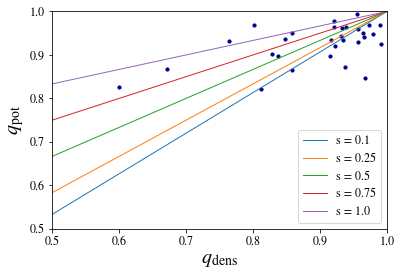

In [35]:
# Plots real data collected
plt.scatter((q),q_pot,c = 'darkblue',s=10)
# Binney and tremaine plots
for i in range(0,5):
    plt.plot(q_BT_den[i],q_BT[:1000]
             ,linewidth = 1
             ,label = 's = '+str(s_BT.reshape(5,1000)[i,0]))
    
    
plt.xlim(0.5,1)
plt.ylim(0.5,1)
    
plt.xlabel(r'$q_{\rm dens}$',fontsize = 20)
plt.ylabel(r'$q_{\rm pot}$',fontsize = 20)
plt.legend(loc = 0,fontsize = 12)
plt.savefig('../Document/q_pot_vs_q_den.pdf', bbox_inches='tight')

In [30]:
# Recalculate line plots maintaining q constant
# Binney and Tremaine formula
## (Q,S) = (f(q,s),g(q,s))
# Given it is bivariate in each variable, we got to choose different values for s
# isopotential semiaxes
q_BT = np.array([0.1,0.25,0.5,0.75,1]*1000)
q_BT.sort()
s_BT = np.array(5*list(np.linspace(0.0001,1,1000)))
axes_BT = np.zeros((3,5000))
axes_BT[0] = 1.0

# PRINCIPAL AXIS 1
axes_BT[1] = q_BT
axes_BT[2] = s_BT
#print(axes_BT)

# The density axes
axes_BT_den = get_density_axes(axes_BT.copy())
# ISODENSITY
q_BT_den = (axes_BT_den[1]/axes_BT_den[0]).reshape((5,1000)) # mid to major axial ratio
s_BT_den = (axes_BT_den[2]/axes_BT_den[0]).reshape((5,1000)) # minor to major axial ratio

# s potential Vs s Volumetric (MHD)
### Comparacion entre los metodos de contornos de isopotencial y el de densidad volumetrico

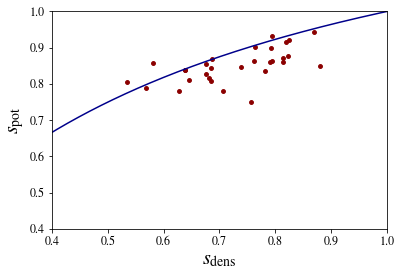

In [31]:

# Plots real data collected
plt.scatter((s),s_pot,c='darkred',s=15)
# Binney and tremaine plots
for i in range(0,1):
    plt.plot(s_BT_den[i],s_BT[:1000],label = q_BT.reshape(5,1000)[i,0],c='darkblue')
    
    
#plt.xlim(0,1)
#plt.ylim(0,1)
    
plt.xlabel(r'$s_{\rm dens}$',fontsize = 20)
plt.ylabel(r'$s_{\rm pot}$', fontsize = 20)
#plt.legend()
plt.xlim(0.4,1)
plt.ylim(0.4,1)
plt.savefig('../Document/s_pot_vs_s_den.pdf',bbox_inches='tight')

In [ ]:
properties = 
